In [1]:
#IRIS DATA Classification using KNN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris_data=pd.read_csv('./archive/iris.csv', index_col='Id') 

In [3]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [12]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [17]:
type(iris_data)

pandas.core.frame.DataFrame

In [15]:
type(iris_dataset)

sklearn.utils._bunch.Bunch

In [6]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
iris_dataset['target_names']

numpy.ndarray

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

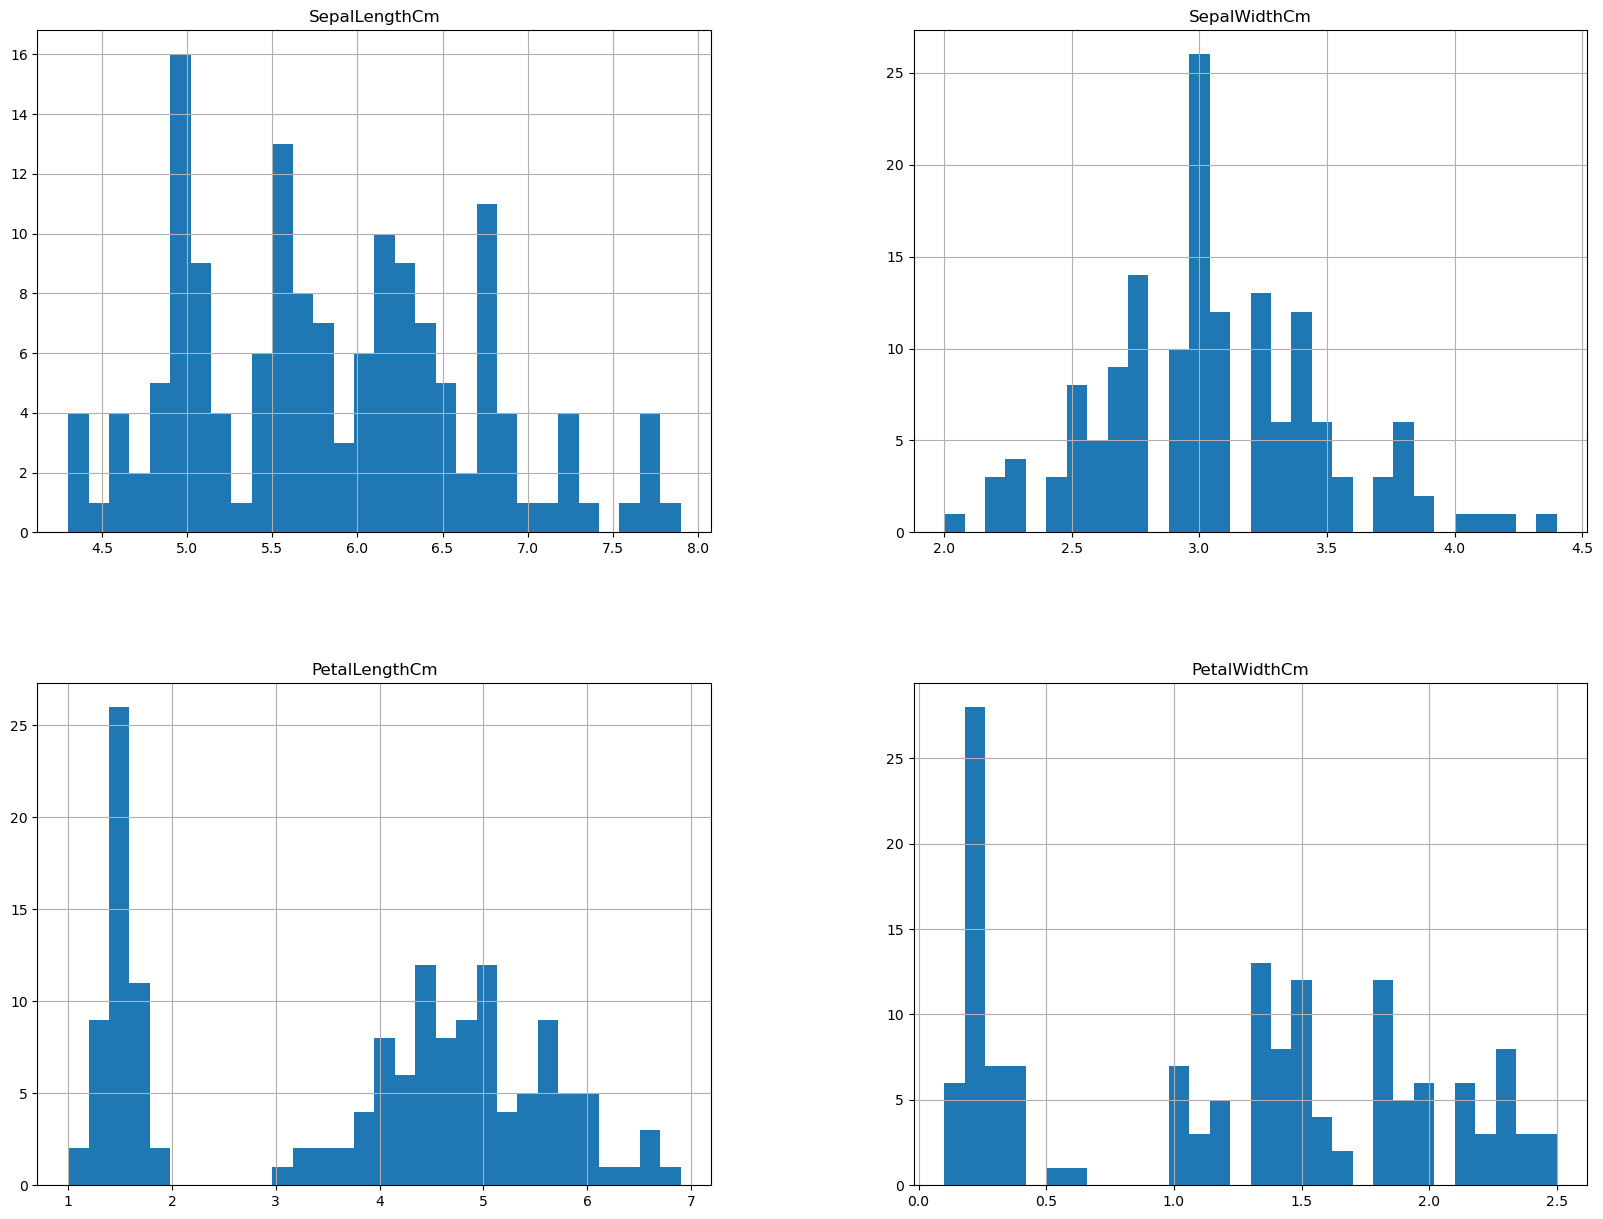

In [6]:
iris_data.hist(bins=30, figsize=(20,15))

In [16]:
iris_data.loc[3]

SepalLengthCm            4.7
SepalWidthCm             3.2
PetalLengthCm            1.3
PetalWidthCm             0.2
Species          Iris-setosa
Name: 3, dtype: object

In [10]:
list('abcdef')

['a', 'b', 'c', 'd', 'e', 'f']

In [15]:
A=pd.Series(list('abcd'), index=[1,2,3,4])

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
train_set, test_set=train_test_split(iris_data)

In [26]:
x_train, x_test, y_train, y_test=train_test_split(iris_dataset['data'], iris_dataset['target'])

In [27]:
x_train

array([[6.1, 2.6, 5.6, 1.4],
       [7. , 3.2, 4.7, 1.4],
       [5.7, 2.5, 5. , 2. ],
       [5.1, 3.8, 1.5, 0.3],
       [5.6, 2.8, 4.9, 2. ],
       [6.3, 3.3, 6. , 2.5],
       [6.9, 3.1, 4.9, 1.5],
       [5. , 3.3, 1.4, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.5, 2.3, 4. , 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [6.1, 3. , 4.6, 1.4],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.2, 1.4, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 5.3, 2.3],
       [5.7, 3. , 4.2, 1.2],
       [6. , 2.9, 4.5, 1.5],
       [4.4, 2.9, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [6.4, 3.1, 5.5, 1.8],
       [6.5, 3.2, 5.1, 2. ],
       [6.2, 2.8, 4.8, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [5.7, 2.8, 4.1, 1.3],
       [6.8, 2.8, 4.8, 1.4],
       [4.4, 3. , 1.3, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [4.9, 2.4, 3.3, 1. ],
       [7.1, 3. , 5.9, 2.1],
       [5.5, 2.4, 3.8, 1.1],
       [7.7, 2.6, 6.9, 2.3],
       [5.5, 4

In [31]:
iris_df=pd.DataFrame(x_train, columns=iris_dataset['feature_names'])

In [36]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

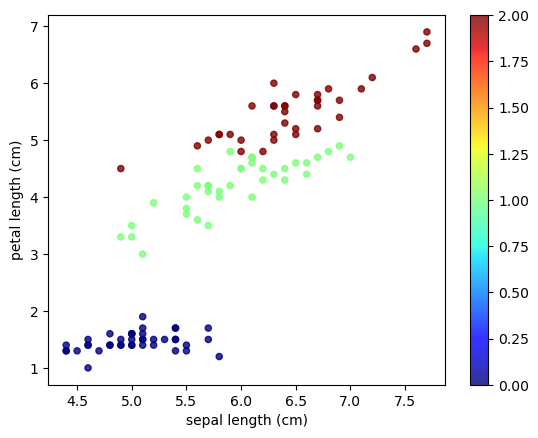

In [47]:
iris_df.plot(kind='scatter', x='sepal length (cm)', y='petal length (cm)', c=y_train, alpha=0.8, cmap=plt.get_cmap('jet'))

In [51]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=1)

In [70]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
x_new=np.array([[5,2.9,1,0.2]])

In [60]:
prediction=knn.predict(x_new)

In [61]:
iris_dataset['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [67]:
knn.fit(train_set.iloc[:, 0:4], train_set.iloc[:, 4])

KNeighborsClassifier(n_neighbors=1)

In [66]:
train_set.iloc[:, 0:4]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
95,5.6,2.7,4.2,1.3
127,6.2,2.8,4.8,1.8
25,4.8,3.4,1.9,0.2
67,5.6,3.0,4.5,1.5
46,4.8,3.0,1.4,0.3
...,...,...,...,...
96,5.7,3.0,4.2,1.2
78,6.7,3.0,5.0,1.7
92,6.1,3.0,4.6,1.4


In [71]:
y_hat=knn.predict(x_test)

In [73]:
np.mean(y_hat==y_test)

0.9473684210526315

In [74]:
knn.score(x_test, y_test)

0.9473684210526315